## Simulation und Modellierung WS 17/18 Uebung 07 : 
### Methode der kleinsten quadratischen Abweichungen

### <u>Aufgabe 1</u>

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve, wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen entweder Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder die matplotlib Funktion `mpl.contour(X,Y,f(X,Y),[1.0])` mit `X,Y = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))`, um die Hoehenlinie $f(X,Y)=1$ darzustellen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

In [66]:
from pylab import *
%matplotlib inline
from random import randint
from time import*
import random

In [25]:
type(time())
t=(time())

In [85]:
from random import randint
from time import*

#vllt. Numerische Lösung??-ist falsch:

data = np.loadtxt('orbit.dat')
h = 0                 #Laufvariabel
n = 30                #multiplikator für die zufallszahlen
kleinsterabstand=10000 #Definiert einen bisherig kleinsten Abstand, der dazu dient mithilfe der Formel den kleinsten Abstand von 1 zu erreichen
abstandges = 0       #Abstand zur eins bei allen Paaren
t = (time())         #um die Zeit zu überprüfen, die die Schleife braucht

#gefundene Variabeln für ABCDE:
Ag = 0
Bg = 0
Cg = 0
Dg = 0
Eg = 0


while h<10000:
    A=randint(-n,n)
    B=randint(-n,n)
    C=randint(-n,n)
    D=randint(-n,n)
    E=randint(-n,n)
    abstandges=0     #setzt den Abstand von 1 in jeder Runde zurück
    
    
    for i in range(0,199):
        x=data[i,0]
        y=data[i,1]
        ergebnis=A * x**2 + B * x * y + C * y**2 + D * x + E * y #überprüft für zufällige ABCDE Variabeln die Formel
        abstandges=abs(1-ergebnis)+abstandges #ist der gesamte Abstand von 1 für alle Gleichungen zusammen (sollte nahe der 0 liegen)
        
    if kleinsterabstand>abstandges:
        kleinsterabstand=abstandges
        Ag = A
        Bg = B
        Cg = C
        Dg = D
        Eg = E
        
    h=h+1

print("                 ", " A", " B", " C", " D", " E  ", "Abstand")
print("Zwischenergebnis:", Ag, Bg, Cg, Dg, Eg, abstandges)
print("Zwischenzeit:",time() - t)




#JETZT: Gibt es Rationale Zahlen im Bereich der früheren Ergebnisse, die den Abstand noch geringer machen?:

h=0
abstandges=0
a=Ag
b=Bg
c=Cg
d=Dg
e=Eg

while h<10000:
    #erstellt Zufallszahlen im Bereich von 1 um die jeweils gefundenen Zahlen für ABCDE 
    A = random.uniform(a+1,a-1)
    B = random.uniform(b+1,b-1)
    C = random.uniform(c+1,c-1) 
    D = random.uniform(d+1,d-1)
    E = random.uniform(e+1,e-1)
    abstandges=0     #setzt den Abstand von 1 in jeder Runde zurück
    
    
    for i in range(0,199):
        x=data[i,0]
        y=data[i,1]
        ergebnis=A * x**2 + B * x * y + C * y**2 + D * x + E * y #überprüft für zufällige ABCDE Variabeln die Formel
        abstandges=abs(1-ergebnis)+abstandges #ist der gesamte Abstand von 1 für alle Gleichungen zusammen (sollte nahe der 0 liegen)
        
    if kleinsterabstand>abstandges:
        kleinsterabstand=abstandges
        Ag = A
        Bg = B
        Cg = C
        Dg = D
        Eg = E
        
    h=h+1
    
print("                 ", " A", " B", " C", " D", " E  ", "Abstand")
print("Endergebnis:", Ag, Bg, Cg, Dg, Eg, abstandges)
print("Endergebnis:",time() - t)


#Überprüfung: Was ist der Kegelschnitt?
if Bg**2 - 4 * Ag * Cg < 0:
    print("Der Kegelschnitt ist eine geschlossene Kurve")
elif B**2 - 4 * Ag * Cg == 0:
    print("Der Kegelschnitt ist eine Parabel")
else:
    print("Der Kegelschnitt ist eine offene Kurve")
    


                   A  B  C  D  E   Abstand
Zwischenergebnis: 8 14 5 -2 0 5841.66499172
Zwischenzeit: 9.018144130706787
                   A  B  C  D  E   Abstand
Endergebnis: 7.095235003423811 13.19823257399707 5.3282388620014265 -2.780630323856948 -0.9099905532854609 115.891255267
Endergebnis: 16.575647115707397
Der Kegelschnitt ist eine offene Kurve


In [87]:
#Überprüfung: Was ist der Kegelschnitt?
if Bg**2 - 4 * Ag * Cg < 0:
    print("Der Kegelschnitt ist eine geschlossene Kurve")
elif B**2 - 4 * Ag * Cg == 0:
    print("Der Kegelschnitt ist eine Parabel")
else:
    print("Der Kegelschnitt ist eine offene Kurve")


Der Kegelschnitt ist eine offene Kurve


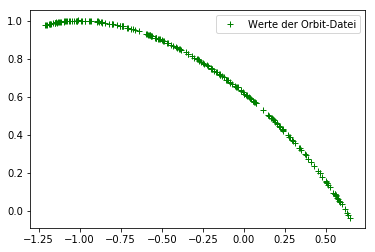

In [95]:
#Plotten der Daten
plot(data[0:200,0], data[0:200,1],'g+',label="Werte der Orbit-Datei")
#plot(x,x,'r',label="y(x)")
legend()
show()

In [ ]:


#erstellt np.array mit den Daten in 'orbit.dat'
#data=np.loadtxt('orbit.dat')
#Zeigt die Dimensionen der Daten an
#print(data.shape)

#a=data
#at=data.transpose()
#aat=(np.dot(a,at))#a*atransponiert

#b=np.random.randn (200,1)
#b[0:200]=1


#c=np.linalg.solve(aat,b)
#print(c)

#print(c.shape)
#plot(c)
#show()
#plot(data[0:200,0],data[0:200,1])
#show()


### <u>Zusatzaufgabe</u>

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Feldern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen. *Hinweis* : `np.random.randn(N)` generiert ein Feld mit N standard normalverteilten Zufallszahlen)
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.